In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from scipy.stats import boxcox

if os.path.abspath('../') not in sys.path:
    sys.path.insert(0, os.path.abspath('../'))

In [2]:
vndata = pd.read_excel('../data/vndata_cleanned.xlsx')
vndata  

,province,year,AREA OF LAND,Population,population density,GROSS REGIONAL DOMESTIC PRODUCT,STATE BUDGET REVENUE,STATE BUDGET EXPENDITURE,INVESTMENT AT CURRENT PRICES,NUMBER OF FARM,PLANTED AREA OF CEREALS,PRODUCTION OF FISHERY,INDEX OF INDUSTRIAL PRODUCTION,RETAIL SALES OF GOODS,NUMBER OF SCHOOLS,NUMBER OF MEDICAL ESTABLISHMENTS,CXARBON GROSS EMISSIONS,TROPICAL FOREST LOSS
0,An Giang,2015,353.70,2000.9,566.0,60466.8,13141.9,17687.6,11228.7,697.0,652.8,348079.0,105.0,35835.0,547.00,191,24733,229
1,An Giang,2016,353.70,1976.4,559.0,65466.9,14282.0,18002.0,11920.3,1180.0,677.1,369843.0,105.7,38093.0,542.00,192,110738,904
2,An Giang,2017,353.60,1954.2,553.0,70719.7,16165.1,22522.4,13488.6,1063.0,649.4,401724.0,106.8,43129.0,536.00,3560,200469,930
3,An Giang,2018,353.70,1931.0,546.0,78152.9,19303.5,24880.1,16146.9,1016.0,630.6,486804.0,108.9,47437.0,530.00,3807,126319,540
4,An Giang,2019,353.70,1907.4,539.0,84939.6,20539.3,26701.5,17695.7,966.0,632.2,539909.0,109.9,51421.0,531.00,3969,34024,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,Yen Bai,2017,688.70,807.3,117.2,24917.8,14616.7,14413.5,10370.8,16.0,70.7,7497.0,106.9,12665.0,192.00,358,360933,752
437,Yen Bai,2018,688.70,814.6,118.3,27590.4,16345.4,16025.7,11105.3,32.0,70.6,9017.0,104.3,13868.0,197.00,371,226560,450
438,Yen Bai,2019,689.30,823.0,119.4,30530.1,18736.1,18480.1,13513.1,34.0,71.6,10485.0,110.9,15979.0,179.00,393,12688,63
439,Yen Bai,2020,689.30,831.6,120.6,33414.8,20577.5,20472.8,15655.2,17.0,72.3,11634.0,108.1,16728.0,177.00,409,970,8


In [3]:
numerical_features = vndata.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features[numerical_features != 'year']
vn_features = vndata[numerical_features]
vn_features


,AREA OF LAND,Population,population density,GROSS REGIONAL DOMESTIC PRODUCT,STATE BUDGET REVENUE,STATE BUDGET EXPENDITURE,INVESTMENT AT CURRENT PRICES,NUMBER OF FARM,PLANTED AREA OF CEREALS,PRODUCTION OF FISHERY,INDEX OF INDUSTRIAL PRODUCTION,RETAIL SALES OF GOODS,NUMBER OF SCHOOLS,NUMBER OF MEDICAL ESTABLISHMENTS,CXARBON GROSS EMISSIONS,TROPICAL FOREST LOSS
0,353.70,2000.9,566.0,60466.8,13141.9,17687.6,11228.7,697.0,652.8,348079.0,105.0,35835.0,547.00,191,24733,229
1,353.70,1976.4,559.0,65466.9,14282.0,18002.0,11920.3,1180.0,677.1,369843.0,105.7,38093.0,542.00,192,110738,904
2,353.60,1954.2,553.0,70719.7,16165.1,22522.4,13488.6,1063.0,649.4,401724.0,106.8,43129.0,536.00,3560,200469,930
3,353.70,1931.0,546.0,78152.9,19303.5,24880.1,16146.9,1016.0,630.6,486804.0,108.9,47437.0,530.00,3807,126319,540
4,353.70,1907.4,539.0,84939.6,20539.3,26701.5,17695.7,966.0,632.2,539909.0,109.9,51421.0,531.00,3969,34024,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,688.70,807.3,117.2,24917.8,14616.7,14413.5,10370.8,16.0,70.7,7497.0,106.9,12665.0,192.00,358,360933,752
437,688.70,814.6,118.3,27590.4,16345.4,16025.7,11105.3,32.0,70.6,9017.0,104.3,13868.0,197.00,371,226560,450
438,689.30,823.0,119.4,30530.1,18736.1,18480.1,13513.1,34.0,71.6,10485.0,110.9,15979.0,179.00,393,12688,63
439,689.30,831.6,120.6,33414.8,20577.5,20472.8,15655.2,17.0,72.3,11634.0,108.1,16728.0,177.00,409,970,8


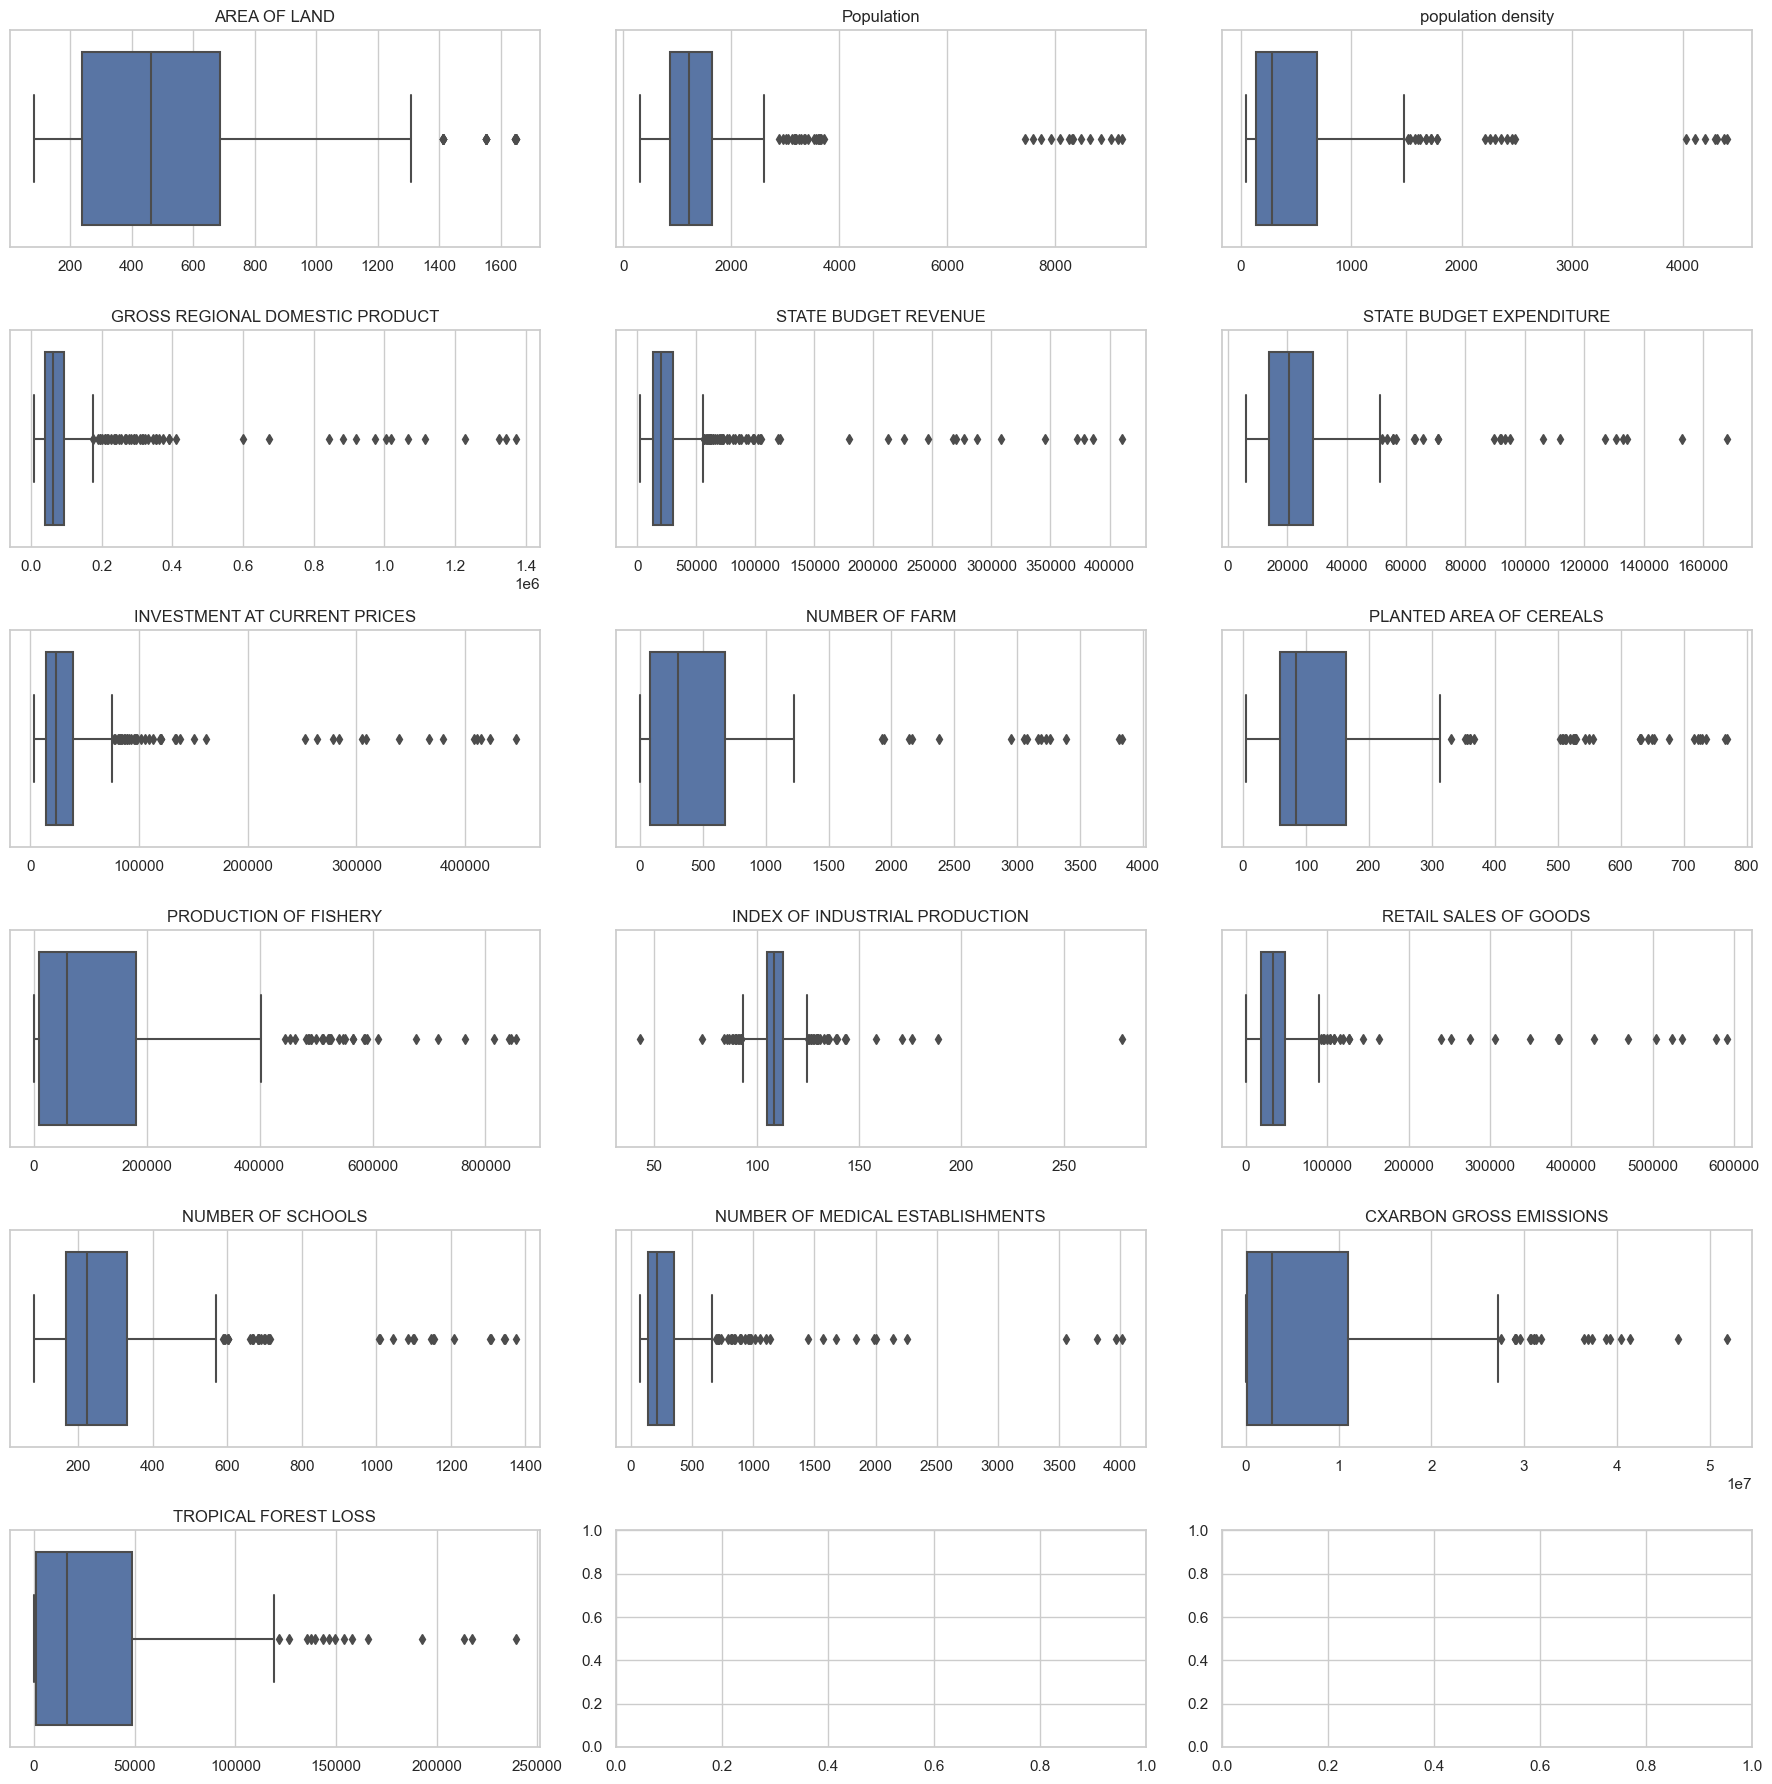

In [4]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 18))
# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(vn_features[:len(axes)]):
    sns.boxplot(x=vn_features[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()


In [5]:
for col in vn_features.columns:
    z_scores = np.abs((vn_features[col] - vn_features[col].mean()) / vn_features[col].std())
    total_outliers = len(vn_features[z_scores > 3])  # Adjust the threshold (e.g., 3) based on your requirements
    print(f"Total outliers in '{col}': {total_outliers}")


Total outliers in 'AREA OF LAND': 7
Total outliers in 'Population': 14
Total outliers in 'population density': 7
Total outliers in 'GROSS REGIONAL DOMESTIC PRODUCT': 13
Total outliers in 'STATE BUDGET REVENUE': 13
Total outliers in 'STATE BUDGET EXPENDITURE': 13
Total outliers in 'INVESTMENT AT CURRENT PRICES': 14
Total outliers in 'NUMBER OF FARM': 11
Total outliers in 'PLANTED AREA OF CEREALS': 14
Total outliers in 'PRODUCTION OF FISHERY': 7
Total outliers in 'INDEX OF INDUSTRIAL PRODUCTION': 6
Total outliers in 'RETAIL SALES OF GOODS': 12
Total outliers in 'NUMBER OF SCHOOLS': 15
Total outliers in 'NUMBER OF MEDICAL ESTABLISHMENTS': 10
Total outliers in 'CXARBON GROSS EMISSIONS': 9
Total outliers in 'TROPICAL FOREST LOSS': 8


In [6]:
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_copy = column.copy()
    column_copy.loc[column < lower_bound] = lower_bound
    column_copy.loc[column > upper_bound] = upper_bound
    return column_copy

# Create a copy of the DataFrame
vn_features_copy = vn_features.copy()

# Apply IQR method to handle outliers for each numerical column
for col in vn_features_copy.columns:
    vn_features_copy[col] = handle_outliers_iqr(vn_features_copy[col])

# Verify the impact on the copied DataFrame
print("Copied DataFrame after handling outliers using IQR method:")
vn_feature = vn_features_copy
vn_features_copy

Copied DataFrame after handling outliers using IQR method:


,AREA OF LAND,Population,population density,GROSS REGIONAL DOMESTIC PRODUCT,STATE BUDGET REVENUE,STATE BUDGET EXPENDITURE,INVESTMENT AT CURRENT PRICES,NUMBER OF FARM,PLANTED AREA OF CEREALS,PRODUCTION OF FISHERY,INDEX OF INDUSTRIAL PRODUCTION,RETAIL SALES OF GOODS,NUMBER OF SCHOOLS,NUMBER OF MEDICAL ESTABLISHMENTS,CXARBON GROSS EMISSIONS,TROPICAL FOREST LOSS
0,353.70,2000.9,566.0,60466.8,13141.9,17687.6,11228.7,697.0,319.55,348079.0,105.0,35835.0,547.00,191,24733.0,229.0
1,353.70,1976.4,559.0,65466.9,14282.0,18002.0,11920.3,1180.0,319.55,369843.0,105.7,38093.0,542.00,192,110738.0,904.0
2,353.60,1954.2,553.0,70719.7,16165.1,22522.4,13488.6,1063.0,319.55,401724.0,106.8,43129.0,536.00,677,200469.0,930.0
3,353.70,1931.0,546.0,78152.9,19303.5,24880.1,16146.9,1016.0,319.55,440373.5,108.9,47437.0,530.00,677,126319.0,540.0
4,353.70,1907.4,539.0,84939.6,20539.3,26701.5,17695.7,966.0,319.55,440373.5,109.9,51421.0,531.00,677,34024.0,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,688.70,807.3,117.2,24917.8,14616.7,14413.5,10370.8,16.0,70.70,7497.0,106.9,12665.0,192.00,358,360933.0,752.0
437,688.70,814.6,118.3,27590.4,16345.4,16025.7,11105.3,32.0,70.60,9017.0,104.3,13868.0,197.00,371,226560.0,450.0
438,689.30,823.0,119.4,30530.1,18736.1,18480.1,13513.1,34.0,71.60,10485.0,110.9,15979.0,179.00,393,12688.0,63.0
439,689.30,831.6,120.6,33414.8,20577.5,20472.8,15655.2,17.0,72.30,11634.0,108.1,16728.0,177.00,409,970.0,8.0


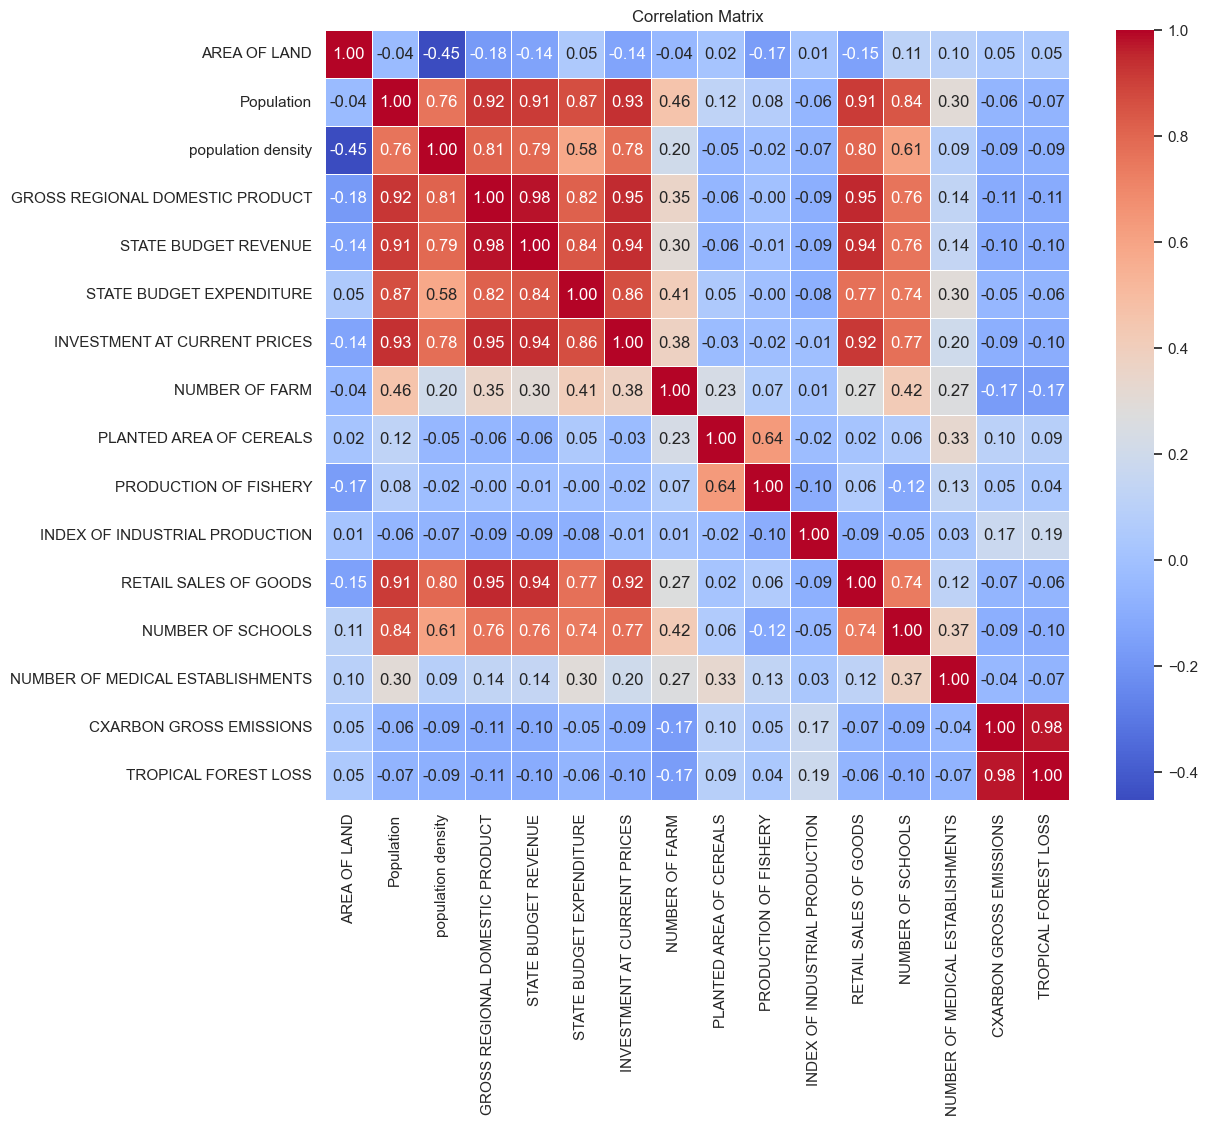

In [7]:
correlation_matrix = vn_features.corr()
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [8]:
# print the correlation matrix between features and the target variable
print(correlation_matrix['TROPICAL FOREST LOSS'].abs().sort_values(ascending=False))

TROPICAL FOREST LOSS                1.000000
CXARBON GROSS EMISSIONS             0.977226
INDEX OF INDUSTRIAL PRODUCTION      0.188712
NUMBER OF FARM                      0.167087
GROSS REGIONAL DOMESTIC PRODUCT     0.110387
STATE BUDGET REVENUE                0.103302
INVESTMENT AT CURRENT PRICES        0.098504
NUMBER OF SCHOOLS                   0.096162
PLANTED AREA OF CEREALS             0.092195
population density                  0.087442
NUMBER OF MEDICAL ESTABLISHMENTS    0.067838
Population                          0.067434
STATE BUDGET EXPENDITURE            0.063849
RETAIL SALES OF GOODS               0.063486
AREA OF LAND                        0.045466
PRODUCTION OF FISHERY               0.039278
Name: TROPICAL FOREST LOSS, dtype: float64


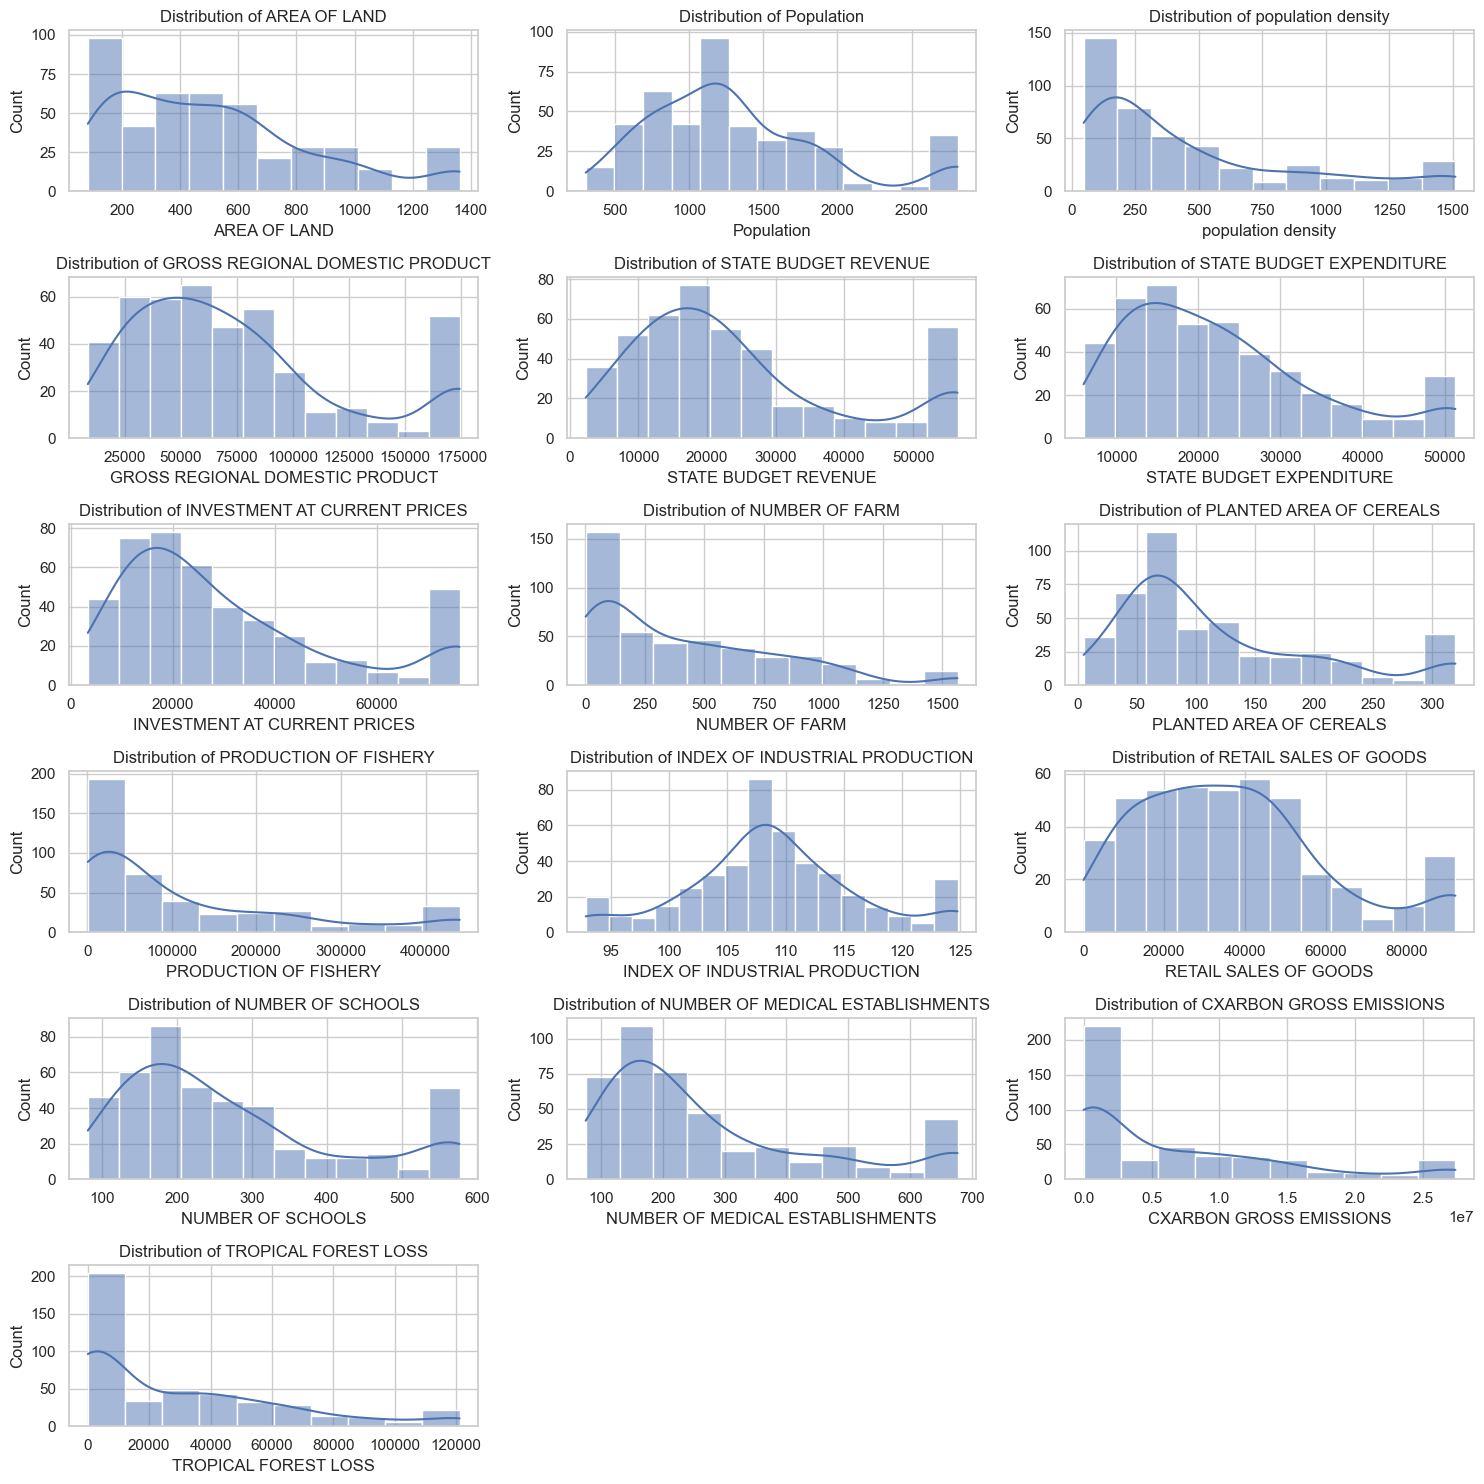

In [9]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(vn_features, 1):
    plt.subplot(6, 3, i)
    sns.histplot(vn_features_copy[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [10]:
# print the skewness of each numerical column
print(vn_features.skew())

AREA OF LAND                        1.128155
Population                          3.908608
population density                  3.325044
GROSS REGIONAL DOMESTIC PRODUCT     4.696815
STATE BUDGET REVENUE                4.721416
STATE BUDGET EXPENDITURE            3.552166
INVESTMENT AT CURRENT PRICES        4.449217
NUMBER OF FARM                      2.998619
PLANTED AREA OF CEREALS             2.534892
PRODUCTION OF FISHERY               2.013652
INDEX OF INDUSTRIAL PRODUCTION      5.131098
RETAIL SALES OF GOODS               5.152321
NUMBER OF SCHOOLS                   2.495463
NUMBER OF MEDICAL ESTABLISHMENTS    5.373325
CXARBON GROSS EMISSIONS             1.805756
TROPICAL FOREST LOSS                1.867678
dtype: float64


In [11]:
skewed_columns = ['Population', 'population density', 'GROSS REGIONAL DOMESTIC PRODUCT',
                   'STATE BUDGET REVENUE', 'STATE BUDGET EXPENDITURE', 'INVESTMENT AT CURRENT PRICES',
                   'NUMBER OF SCHOOLS', 'NUMBER OF MEDICAL ESTABLISHMENTS', 'CXARBON GROSS EMISSIONS',
                   'TROPICAL FOREST LOSS','INDEX OF INDUSTRIAL PRODUCTION','NUMBER OF FARM','PLANTED AREA OF CEREALS',
                   'PRODUCTION OF FISHERY']

for col in skewed_columns:
    vn_features[col], _ = boxcox(vn_features[col] + 1)  # Adding 1 to handle non-positive values


C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\1573924295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_features[col], _ = boxcox(vn_features[col] + 1)  # Adding 1 to handle non-positive values


In [12]:
# apply log1p transformation to RETAIL SALES OF GOODS
vn_features['RETAIL SALES OF GOODS'] = np.sqrt(vn_features['RETAIL SALES OF GOODS'])
# fill the NaN values in RETAIL SALES OF GOODS with mean value 
print(vn_features.skew())

AREA OF LAND                        1.128155
Population                         -0.073675
population density                  0.030044
GROSS REGIONAL DOMESTIC PRODUCT    -0.037792
STATE BUDGET REVENUE               -0.042452
STATE BUDGET EXPENDITURE            0.002907
INVESTMENT AT CURRENT PRICES       -0.017327
NUMBER OF FARM                     -0.069962
PLANTED AREA OF CEREALS             0.019356
PRODUCTION OF FISHERY              -0.076657
INDEX OF INDUSTRIAL PRODUCTION     -0.190138
RETAIL SALES OF GOODS               2.683065
NUMBER OF SCHOOLS                   0.030004
NUMBER OF MEDICAL ESTABLISHMENTS    0.053683
CXARBON GROSS EMISSIONS            -0.341921
TROPICAL FOREST LOSS               -0.317957
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\279296076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_features['RETAIL SALES OF GOODS'] = np.sqrt(vn_features['RETAIL SALES OF GOODS'])


In [13]:
vn_features

,AREA OF LAND,Population,population density,GROSS REGIONAL DOMESTIC PRODUCT,STATE BUDGET REVENUE,STATE BUDGET EXPENDITURE,INVESTMENT AT CURRENT PRICES,NUMBER OF FARM,PLANTED AREA OF CEREALS,PRODUCTION OF FISHERY,INDEX OF INDUSTRIAL PRODUCTION,RETAIL SALES OF GOODS,NUMBER OF SCHOOLS,NUMBER OF MEDICAL ESTABLISHMENTS,CXARBON GROSS EMISSIONS,TROPICAL FOREST LOSS
0,353.70,2.723220,4.422683,3.892541,5.097568,3.103430,3.537305,15.753083,8.291985,34.467869,3.043045,189.301347,2.383427,1.818103,30.716978,10.179947
1,353.70,2.722285,4.416924,3.898252,5.117894,3.104310,3.542704,18.412275,8.350664,34.815159,3.045654,195.174281,2.382601,1.818453,42.575065,15.173988
2,353.60,2.721424,4.411923,3.903698,5.147695,3.115100,3.553609,17.857977,8.283614,35.293295,3.049714,207.675227,2.381595,1.920157,48.286397,15.293222
3,353.70,2.720511,4.406011,3.910602,5.189448,3.119662,3.568874,17.622175,8.236583,36.425135,3.057328,217.800367,2.380573,1.921151,43.786899,13.127472
4,353.70,2.719566,4.400014,3.916231,5.203793,3.122817,3.576380,17.362019,8.240636,37.047608,3.060893,226.761990,2.380744,1.921751,32.964961,9.344760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,688.70,2.642746,3.622596,3.820908,5.123509,3.092846,3.529996,4.043852,5.014438,17.430466,3.050081,112.538882,2.268011,1.854196,54.617470,14.417036
437,688.70,2.643672,3.627783,3.829931,5.150337,3.098411,3.536298,5.453379,5.012531,18.061934,3.040415,117.762473,2.271424,1.855920,49.546039,12.455235
438,689.30,2.644723,3.632918,3.838682,5.182504,3.105611,3.553767,5.589490,5.031490,18.589820,3.064419,126.408069,2.258535,1.858639,26.430985,6.653606
439,689.30,2.645785,3.638459,3.846310,5.204221,3.110595,3.566299,4.156752,5.044618,18.960131,3.054448,129.336770,2.256993,1.860476,14.184485,2.794290


In [14]:
vn_features.isnull().sum()

AREA OF LAND                        0
Population                          0
population density                  0
GROSS REGIONAL DOMESTIC PRODUCT     0
STATE BUDGET REVENUE                0
STATE BUDGET EXPENDITURE            0
INVESTMENT AT CURRENT PRICES        0
NUMBER OF FARM                      0
PLANTED AREA OF CEREALS             0
PRODUCTION OF FISHERY               0
INDEX OF INDUSTRIAL PRODUCTION      0
RETAIL SALES OF GOODS               0
NUMBER OF SCHOOLS                   0
NUMBER OF MEDICAL ESTABLISHMENTS    0
CXARBON GROSS EMISSIONS             0
TROPICAL FOREST LOSS                0
dtype: int64

In [21]:
# save the transformed data
vn_features.to_excel('../data/vndata_transformed.xlsx', index=False)

In [15]:
# split into train and test 
X = vn_features.drop('TROPICAL FOREST LOSS', axis=1)
Y = vn_features['TROPICAL FOREST LOSS']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

In [16]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# for ytrain and ytest
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [19]:
# linear regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
Y_pred = linear_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Linear Regression')
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('r2 %.2f' % r2_score(Y_test, Y_pred))


Linear Regression
Mean squared error: 0.16
r2 0.83


In [20]:
# decision tree 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)
Y_pred = tree_reg.predict(X_test)

print('Decision Tree')
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('r2 %.2f' % r2_score(Y_test, Y_pred))

Decision Tree
Mean squared error: 0.04
r2 0.96
